In [96]:
import os
import copy
import numpy as np
import pandas as pd
from PIL import Image

class ImageConcat:
    def __init__(self, n_h, n_v, resolution=1000):
        self.n_h = n_h
        self.n_v = n_v
        self.r = resolution
        self.img = Image.new("L", (self.n_h*self.r, self.n_v*self.r), color=255)# color=(255,255,255))
        self.cursor = [0,0]
        self.max_h = 0
    
    def move_cursor_h(self, r):
        self.cursor[0] += r
        if self.cursor[0] > self.max_h:
            self.max_h = copy.deepcopy(self.cursor[0])
        
    def move_cursor_v(self):
        self.cursor[1] += self.r
        
    def reset_cursor_h(self):
        self.cursor[0] = 0
        
    def append_img(self, path, cut_margin=True, clip_white=False):
        try:
            img = Image.open(path).convert('L').resize((self.r,self.r), Image.BILINEAR)
            if cut_margin:
                img = self.cut_margin(img, clip_white=clip_white)
            self.img.paste(img, tuple(self.cursor))
            return img.size
        except:
            # print(f"Not Appended: {path}")
            return None
        
    def add_letter(self, path, cut_margin=True, clip_white=False):
        imgsize = self.append_img(path, cut_margin=cut_margin, clip_white=clip_white)
        if imgsize is None:
            self.move_cursor_h(self.r)
        else:
            self.move_cursor_h(imgsize[0])
    
    def add_space(self):
        self.move_cursor_h(int(self.r/3))
        
    def enter(self):
        self.move_cursor_v()
        self.reset_cursor_h()
        
    def cut_margin(self, img, clip_white):
        npimg = 255 - np.array(img)
        if clip_white:
            npimg[np.where(npimg<10)] = 0 
        wmin = npimg.sum(0).nonzero()[0].min()
        wmax = npimg.sum(0).nonzero()[0].max()
        # hmin = npimg.sum(1).nonzero()[0].min()
        # hmax = npimg.sum(1).nonzero()[0].max()

        npimg = 255 - npimg[:,wmin:wmax+1]
        img = Image.fromarray(npimg)
        return img
    
class ImageConcat2(ImageConcat):
    def __init__(self, n_h, n_v, resolution=1000):
        super().__init__(n_h,n_v,resolution)
    
    def append_img(self, path, cut_margin=True, clip_white=False):
        try:
            img = Image.open(path).convert('L')
            if cut_margin:
                img = self.cut_margin(img, clip_white=clip_white)
            self.img.paste(img, tuple(self.cursor))
            return img.size
        except:
            # print(f"Not Appended: {path}")
            return None 

In [83]:
font = "트와이스나연"
augs = ["closing","erode","dilate"]
fd = f"/home/jupyter/ai_font/data/train/{font}"
savefd = "/home/jupyter/ai_font/data/examples"

In [84]:
patriot = '''
동해물과
백두산이
마르고
닳도록
하느님이
보우하사
우리나라
만세
'''

In [85]:
fontsize = 96
n_lines = int(9)
tag = "애국가"
text = patriot
for aug in augs:
    bigimg = ImageConcat(4, n_lines, fontsize)
    for k in text:
        if k == "\n":
            bigimg.enter()
        elif k == " ":
            bigimg.add_space()
        else:
            path = f"{fd}/{font}__{aug}__{k}.png"
            bigimg.add_letter(path, clip_white=True)
    bigimg.img.save(f"{savefd}/{font}__{aug}__{tag}.png")

In [ ]:
fontsize = 96
n_lines = int(9)
tag = "애국가"
text = patriot
for aug in augs:
    bigimg = ImageConcat(4, n_lines, fontsize)
    for k in text:
        if k == "\n":
            bigimg.enter()
        elif k == " ":
            bigimg.add_space()
        else:
            path = f"{fd}/{font}__{aug}__{k}.png"
            bigimg.add_letter(path, clip_white=True)
    bigimg.img.save(f"{savefd}/{font}__{aug}__{tag}.png")

In [116]:
fontsize = 96
n_lines = int(9)
tag = "애국가"
text = patriot
origfd = "/home/jupyter/ai_font/data/orig"
aug = "orig"
fonts = ["트와이스나연","시스템굴림","어비재윤체","교보손글씨2019"]
for font in fonts:
    bigimg = ImageConcat(4, n_lines, fontsize)
    for k in text:
        if k == "\n":
            bigimg.enter()
        elif k == " ":
            bigimg.add_space()
        else:
            path = f"{origfd}/{font}/{font}__{aug}__{k}.png"
            bigimg.add_letter(path, clip_white=True)
    bigimg.img.save(f"{savefd}/{font}__{aug}__{tag}.png")

In [117]:
fontsize = 96
n_lines = int(9)
tag = "애국가"
for font in fonts:
    augs = ["orig","closing","erode","dilate"]
    bigimg = ImageConcat2(4*4, n_lines, fontsize)
    for aug in augs:
        path = f"{savefd}/{font}__{aug}__{tag}.png"
        bigimg.add_letter(path, cut_margin=False, clip_white=True)    
    bigimg.img.save(f"{savefd}/{font}__{tag}.png")

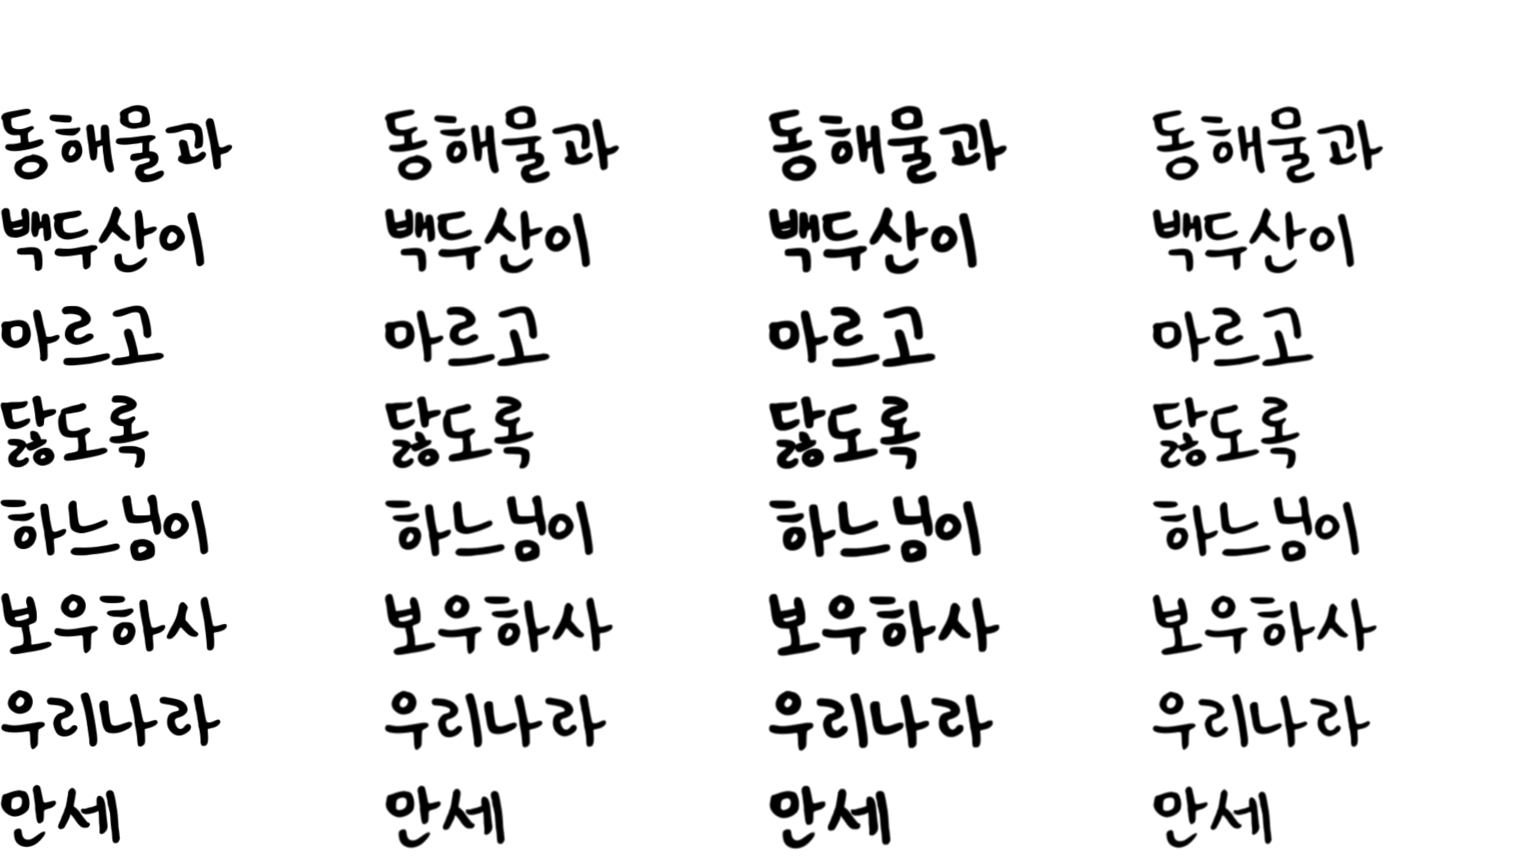

In [113]:
bigimg.img